# Data Loading

# 1.1.	Load the Covid 19 India dataset  

In [64]:
import pandas as pd

In [65]:
data = pd.read_csv('covid19.csv')

In [66]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


# Cleaning the data

# 2.1.	Check for null values

In [67]:
# Check for null values
null_values = data.isnull().sum()

# Display null values for each column
print(null_values)

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64


# 2.2.	Check for duplicates

In [68]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Display the number of duplicate rows
print(f'Number of duplicate rows: {duplicate_rows}')

Number of duplicate rows: 0


# 2.3.	Droping irrelevant columns (e.g., S No)

In [69]:
data.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [70]:
# Drop the irrelevant column(s)
data.drop(columns=['Sno'], inplace=True)
data.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


# 2.4.	Column datatype conversion (e.g., Date)

In [74]:
# Check the datatype of 'date_column'
print(data['Date'].dtype)

object


In [75]:
data['Date'] = pd.to_datetime(data['Date'])

In [76]:
print(data['Date'].dtype)

datetime64[ns]


# Exploring the data using queries

# 3.1.	How many corona patients were confirmed in Kerala?

In [79]:
# Filter data for Kerala (assuming 'Province' column indicates state)
kerala_data = data[data['State/UnionTerritory'] == 'Kerala']
# Sum the confirmed cases in Kerala
total_confirmed_kerala = kerala_data['Confirmed'].sum()

print(f"Total confirmed COVID-19 cases in Kerala: {total_confirmed_kerala}")

Total confirmed COVID-19 cases in Kerala: 458906023


# 3.2.	Which state has the highest number of cured cases?

In [80]:
# Find the state with the highest number of cured cases
state_with_highest_cured = data.loc[data['Cured'].idxmax()]

print(f"State with the highest number of cured cases: {state_with_highest_cured['State/UnionTerritory']}")
print(f"Number of cured cases: {state_with_highest_cured['Cured']}")

State with the highest number of cured cases: Maharashtra
Number of cured cases: 6159676


# 3.3.	How many patients died during 2020 to 2021?

In [83]:
# Filter data for the year 2020 and 2021
data_filtered = data[(data['Date'].dt.year == 2020) | (data['Date'].dt.year == 2021)]

# Sum the deaths in the filtered data
total_deaths = data_filtered['Deaths'].sum()
print(f"Total number of COVID-19 deaths during 2020 and 2021: {total_deaths}")

Total number of COVID-19 deaths during 2020 and 2021: 73389005


# 3.4.	Which state has the highest number of confirmed cases?

In [84]:
# Find the state with the highest number of confirmed cases
state_with_highest_confirmed = data.loc[data['Confirmed'].idxmax()]

print(f"State with the highest number of confirmed cases: {state_with_highest_confirmed['State/UnionTerritory']}")
print(f"Number of confirmed cases: {state_with_highest_confirmed['Confirmed']}")

State with the highest number of confirmed cases: Maharashtra
Number of confirmed cases: 6363442


# Visualization

# 4.1.	Visualizing the distribution of corona patients from 2020 to 2021.

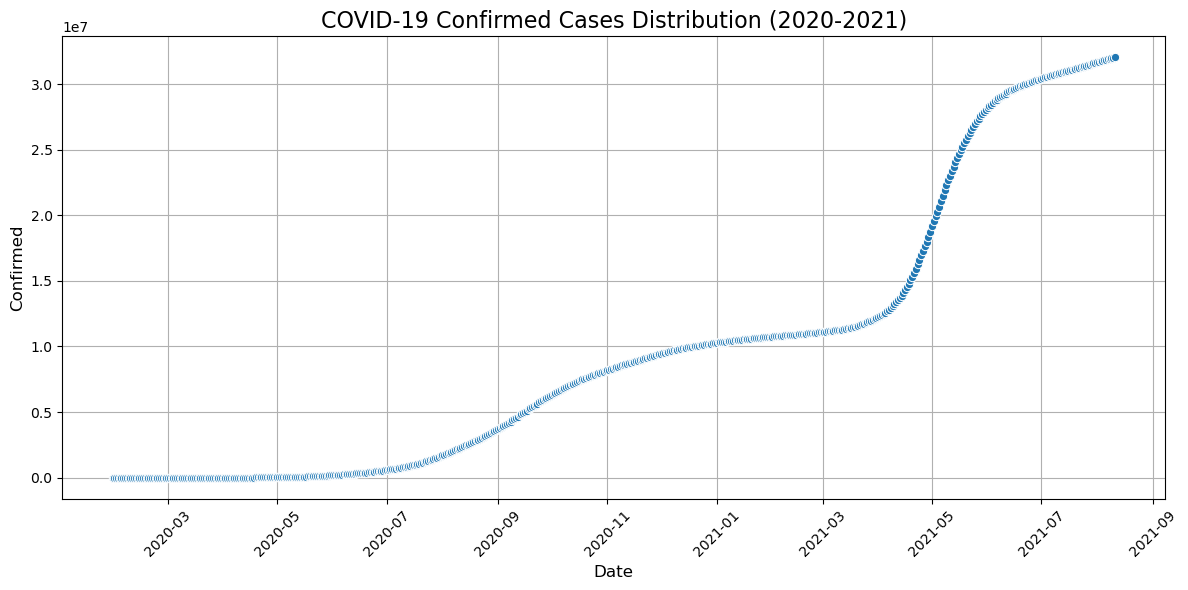

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the years 2020 and 2021
data_filtered = data[(data['Date'].dt.year >= 2020) & (data['Date'].dt.year <= 2021)]

# Aggregate the data by date (if data is reported daily or weekly)
data_agg = data_filtered.groupby('Date')['Confirmed'].sum().reset_index()

# Set plot size
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=data_agg, x='Date', y='Confirmed', marker='o')

# Customize the plot
plt.title('COVID-19 Confirmed Cases Distribution (2020-2021)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Confirmed', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# 4.2.	Visualizing the distribution of corona patients in all the states of India.

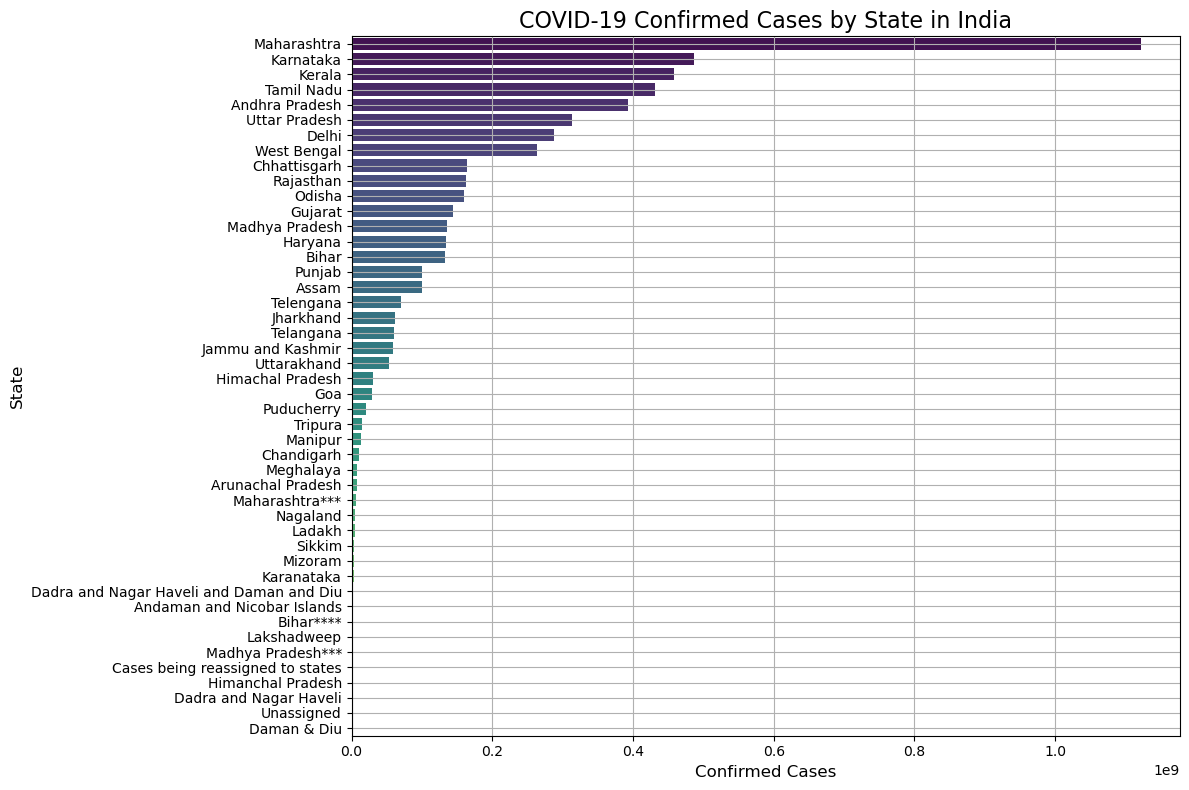

In [90]:
# Aggregate the total confirmed cases by state
data_statewise = data.groupby('State/UnionTerritory')['Confirmed'].sum().reset_index()
# Sort by confirmed cases to make the plot clearer
data_statewise = data_statewise.sort_values(by='Confirmed', ascending=False)
# Set plot size
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(data=data_statewise, x='Confirmed', y='State/UnionTerritory', palette='viridis')

# Customize the plot
plt.title('COVID-19 Confirmed Cases by State in India', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# 4.3.	Visualizing the total number of deaths in all the states. 

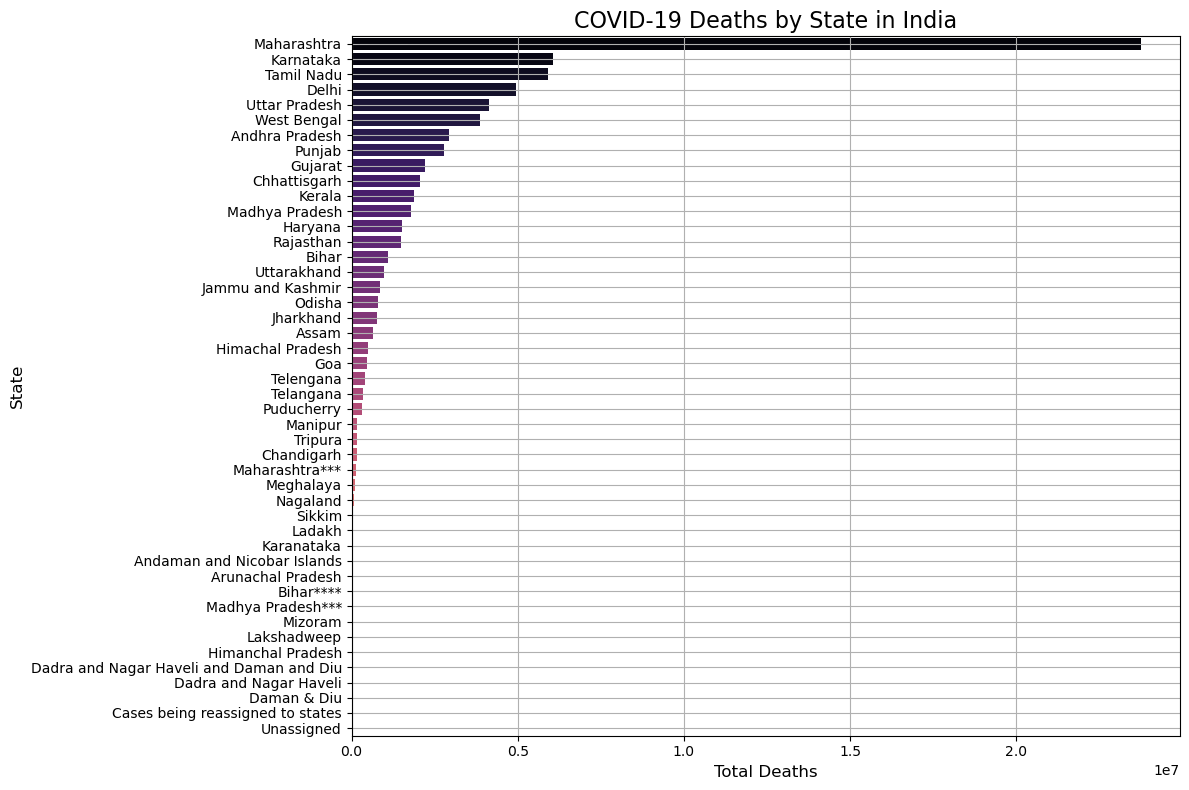

In [93]:
# Aggregate the total deaths by state
data_statewise_deaths = data.groupby('State/UnionTerritory')['Deaths'].sum().reset_index()

# Sort by deaths to make the plot clearer
data_statewise_deaths = data_statewise_deaths.sort_values(by='Deaths', ascending=False)

# Set plot size
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(data=data_statewise_deaths, x='Deaths', y='State/UnionTerritory', palette='magma')

# Customize the plot
plt.title('COVID-19 Deaths by State in India', fontsize=16)
plt.xlabel('Total Deaths', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
